In [33]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
taxi_data = pd.read_csv("taxi.csv")
taxi_data.head()
print(taxi_data.columns)

Index(['medallion', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'trip_time_in_secs', 'fare_amount', 'tip_amount'],
      dtype='object')


In [35]:
trips_data = pd.read_csv("trips.csv")
trips_data.head()
print(trips_data.columns)

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')


In [36]:
merge_data = pd.merge(trips_data, taxi_data)
print(merge_data.columns)

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'fare_amount', 'tip_amount'],
      dtype='object')


In [37]:
merge_data = merge_data.drop(['hack_license', 'vendor_id', 'rate_code', 'store_and_fwd_flag', 'passenger_count', 'tip_amount'], axis=1)
print(merge_data.columns)



Index(['medallion', 'pickup_datetime', 'dropoff_datetime', 'trip_time_in_secs',
       'trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount'],
      dtype='object')


In [38]:
merge_data = merge_data.dropna()
merge_data.head()


,medallion,pickup_datetime,dropoff_datetime,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount
0,4D24F4D8EF35878595044A52B098DFD2,2013-01-13T10:23:00Z,2013-01-13T10:33:00Z,600,1.11,-73.946457,40.772728,-73.954819,40.777840,8.0
1,A49C37EB966E7B05E69523D1CB7BE303,2013-01-13T04:52:00Z,2013-01-13T05:06:00Z,840,5.35,-73.998268,40.740414,-73.984909,40.674999,18.0
2,1E4B72A8E623888F53A9693C364AC05A,2013-01-13T10:47:00Z,2013-01-13T10:48:00Z,60,0.50,-73.953461,40.775864,-73.955238,40.773216,3.5
3,F7E4E9439C46B8AD5B16AB9F1B3279D7,2013-01-13T11:14:00Z,2013-01-13T11:26:00Z,720,2.66,-73.981369,40.724731,-74.012932,40.717426,11.5
4,A9DC75D59E0EA27E1ED328E8BE8CD828,2013-01-13T11:24:00Z,2013-01-13T11:28:00Z,240,1.49,-73.967995,40.760002,-73.955513,40.776730,6.5


In [39]:
merge_data['medallion'].value_counts()

medallion
BCC1B5B7D9596FEC872C9DAD725310B3    15
723B5809862054401FA26A9219A45FC5    15
CBAAA9C7A2B8ADF468BA2477E22BD763    14
D6FDD900F5504C7FD5C0B999966E0F07    13
B6585890F68EE02702F32DECDEABC2A8    13
                                    ..
85E0A289F58009CF568A928219082EDC     1
6C0E03106318253CAD879114FC991B66     1
7A4720A674F0EDBF9E71EB37EF0DB47B     1
473E20C6CBE91A07C2CA161158E35AE4     1
A6DB36B570BD59E08FBE76086C5EE662     1
Name: count, Length: 12744, dtype: int64

In [40]:
merge_data.describe()

,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount
count,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000
mean,757.281306,2.907660,-72.562461,39.825872,-72.539657,39.812613,12.443674
std,654.997964,3.377631,10.773865,7.837667,10.846693,7.872047,13.658216
min,0.000000,0.000000,-82.634415,-74.014969,-77.115440,-74.177155,0.000000
25%,365.000000,1.060000,-73.992294,40.734245,-73.991592,40.733475,6.500000
50%,600.000000,1.800000,-73.982025,40.752079,-73.980255,40.752808,9.500000
75%,960.000000,3.200000,-73.966904,40.767099,-73.963593,40.767857,14.000000
max,75240.000000,53.000000,40.811337,41.589775,40.859077,41.107189,2069.500000


In [41]:
print(merge_data.isnull().sum())

medallion            0
pickup_datetime      0
dropoff_datetime     0
trip_time_in_secs    0
trip_distance        0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
fare_amount          0
dtype: int64


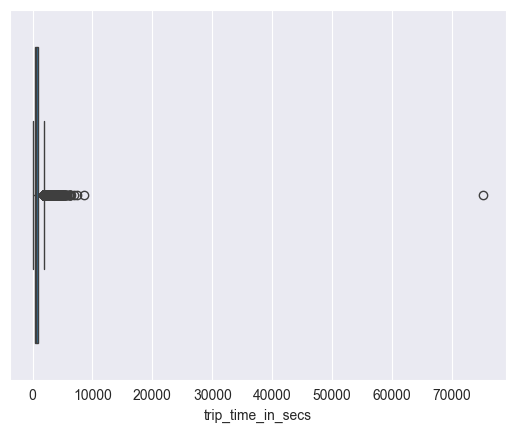

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=merge_data['trip_time_in_secs'])
plt.show()


In [43]:
merge_data = merge_data[merge_data['trip_time_in_secs'] < 7200]  # Remove trips longer than 4 hours


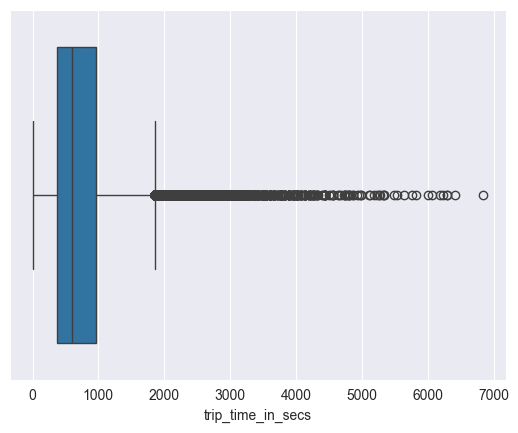

In [44]:
sns.boxplot(x=merge_data['trip_time_in_secs'])
plt.show()


In [45]:
merge_data.describe()

,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount
count,49996.000000,49996.000000,49996.000000,49996.000000,49996.000000,49996.000000,49996.000000
mean,755.501400,2.906785,-72.563855,39.826631,-72.541058,39.813376,12.400947
std,562.103317,3.374326,10.769295,7.835876,10.842163,7.870268,10.092351
min,0.000000,0.000000,-82.634415,-74.014969,-77.115440,-74.177155,0.000000
25%,365.000000,1.060000,-73.992294,40.734245,-73.991594,40.733479,6.500000
50%,600.000000,1.800000,-73.982025,40.752077,-73.980259,40.752809,9.500000
75%,960.000000,3.200000,-73.966904,40.767101,-73.963593,40.767858,14.000000
max,6847.000000,53.000000,40.811337,41.589775,40.859077,41.107189,198.000000


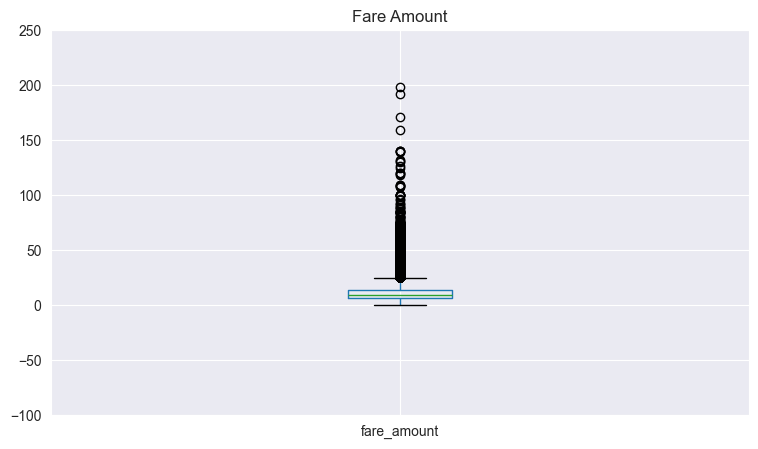

In [61]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
fig, ax = plt.subplots()

merge_data.boxplot(column='fare_amount', ax=ax)
ax.set_title('Fare Amount')
ax.set_ylim(-100, 250)


plt.show()

In [62]:
from geopy.distance import geodesic

merge_data['distance'] = merge_data.apply(lambda row: geodesic((row['pickup_latitude'], row['pickup_longitude']),
                                                                 (row['dropoff_latitude'], row['dropoff_longitude'])).miles, axis=1)


In [64]:
merge_data = merge_data[(merge_data['pickup_latitude'].between(40, 41)) & 
                          (merge_data['pickup_longitude'].between(-75, -72)) &
                          (merge_data['dropoff_latitude'].between(40, 41)) & 
                          (merge_data['dropoff_longitude'].between(-75, -72))]


In [65]:
merge_data.describe()

,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,distance
count,49064.000000,49064.000000,49064.000000,49064.000000,49064.000000,49064.000000,49064.000000,49064.000000
mean,756.538012,2.907307,-73.975036,40.750292,-73.974579,40.750887,12.331557,2.115389
std,560.117836,3.348193,0.035620,0.027614,0.034959,0.031232,9.746449,2.282912
min,0.000000,0.000000,-74.315605,40.127800,-74.315605,40.127800,0.000000,0.000000
25%,367.000000,1.060000,-73.992500,40.735573,-73.991791,40.734806,6.500000,0.801568
50%,602.000000,1.800000,-73.982254,40.752579,-73.980644,40.753477,9.500000,1.364479
75%,960.000000,3.200000,-73.968063,40.767456,-73.965116,40.768170,14.000000,2.485637
max,6847.000000,38.020000,-73.546356,40.913631,-72.688133,40.967796,159.500000,45.216778


In [69]:
merge_data.shape

(49064, 11)

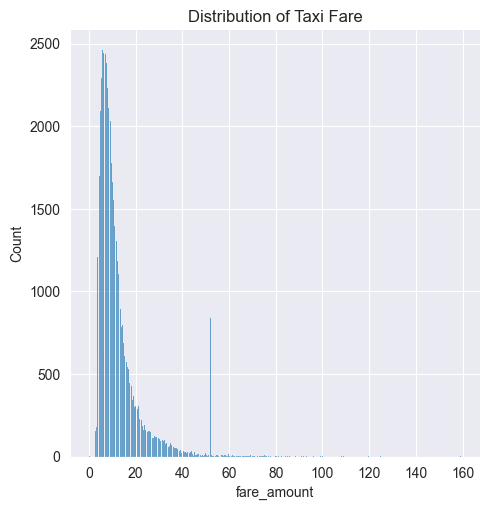

In [70]:
sns.displot(merge_data[merge_data['fare_amount']<200]['fare_amount'])
plt.title('Distribution of Taxi Fare')
plt.show()